In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def load_data(path):
    df = pd.read_csv(path)
    print(f"Loaded {path} successfully")
    print(f"Shape: {df.shape}")
    return df

In [62]:
coffee_price_df = load_data("coffee_label.csv")
news1 = load_data("predict_dailycoffeenews_250331.csv")
news2 = load_data("predict_usda_coffee_articles_250520.csv")
news3 = load_data("predict_usda_robusta_articles_250520.csv")
news4 = load_data("predict_worldcoffeeportal_250331.csv")
news5 = load_data("predicted_news_250601.csv")


Loaded coffee_label.csv successfully
Shape: (3734, 3)
Loaded predict_dailycoffeenews_250331.csv successfully
Shape: (4407, 21)
Loaded predict_usda_coffee_articles_250520.csv successfully
Shape: (31, 21)
Loaded predict_usda_robusta_articles_250520.csv successfully
Shape: (47, 21)
Loaded predict_worldcoffeeportal_250331.csv successfully
Shape: (131, 21)
Loaded predicted_news_250601.csv successfully
Shape: (91, 21)


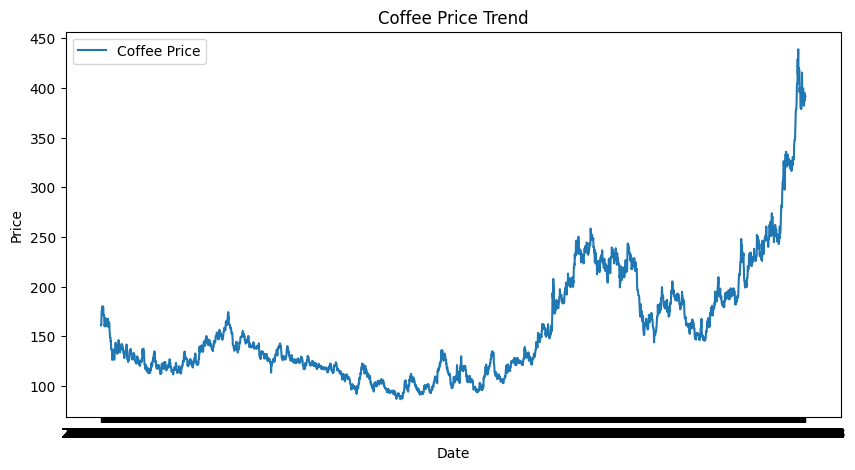

In [63]:
# 커피 가격 시각화(x축 데이터는 시작과 끝만 보여줌)
plt.figure(figsize=(10, 5))
plt.plot(coffee_price_df['Date'], coffee_price_df['Coffee_Price'], label='Coffee Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Coffee Price Trend')
plt.legend()
plt.show()


In [64]:
# 커피 가격 날짜 시작과 끝 출력
print(f"커피 가격 날짜 시작과 끝: {coffee_price_df['Date'].iloc[0]} ~ {coffee_price_df['Date'].iloc[-1]}")


커피 가격 날짜 시작과 끝: 2015-01-02 ~ 2025-03-23


In [65]:
news_df = pd.concat([news1, news2, news3, news4, news5])
news_df = news_df.drop_duplicates(subset=['date', 'title'])
# 날짜 정렬
news_df = news_df.sort_values(by='date')
print(news_df.head())


          date                                              title  \
46  2010-12-08  Winter Farmers Markets are Hot Despite the Col...   
45  2012-01-16  Agriculture Secretary Vilsack Highlights Vital...   
30  2012-01-18  USDA Grant Helps Coffee Farmers Win Honduras’ ...   
44  2012-02-10  Statement from Agriculture Secretary Vilsack o...   
43  2012-02-24  USDA Goes the Extra Mile for Producers, Helpin...   

                                                  url  is_price_related  \
46  https://www.usda.gov/about-usda/news/blog/wint...              True   
45  https://www.usda.gov/about-usda/news/press-rel...              True   
30  https://www.usda.gov/about-usda/news/blog/usda...              True   
44  https://www.usda.gov/about-usda/news/press-rel...              True   
43  https://www.usda.gov/about-usda/news/press-rel...              True   

                                   preprocessed_title  positive_sentiment  \
46    winter farmers markets hot despite cold weather    

In [66]:
# news_df에서 2014년 이전 삭제
news_df = news_df[news_df['date'] >= '2014-01-01']
print(news_df.head())


            date                                              title  \
27    2014-02-07  Northern Plains Climate Hub Aims to Help Produ...   
26    2014-10-31  U.S. Forest Service Harvests 2014 U.S. Capitol...   
4406  2015-01-04  Coffee Cup Pop Cartoonist @yoyoha Renews 100-C...   
4405  2015-01-04  Now Brewing in San Francisco’s Inner Sunset: S...   
4403  2015-01-05  Who Roasted the ‘Miracle Coffee’ That Saved Se...   

                                                    url  is_price_related  \
27    https://www.usda.gov/about-usda/news/blog/nort...              True   
26    https://www.usda.gov/about-usda/news/blog/us-f...              True   
4406  https://dailycoffeenews.com/2015/01/04/coffee-...              True   
4405  https://dailycoffeenews.com/2015/01/04/now-bre...              True   
4403  https://dailycoffeenews.com/2015/01/05/who-roa...              True   

                                     preprocessed_title  positive_sentiment  \
27    northern plains climate h

In [67]:
print(news_df.columns)
# predicted_price_direction 컬럼이 neutral인 데이터 삭제
news_df = news_df[news_df['predicted_price_direction'] != 'neutral']
print(news_df.shape)
print(news_df['predicted_price_direction'].unique())


Index(['date', 'title', 'url', 'is_price_related', 'preprocessed_title',
       'positive_sentiment', 'negative_sentiment', 'neutral_sentiment',
       'rise_present', 'increase_present', 'jump_present', 'surge_present',
       'climb_present', 'fall_present', 'drop_present', 'decrease_present',
       'decline_present', 'plunge_present', 'weighted_positive_sentiment',
       'weighted_negative_sentiment', 'predicted_price_direction'],
      dtype='object')
(277, 21)
['rise' 'fall']


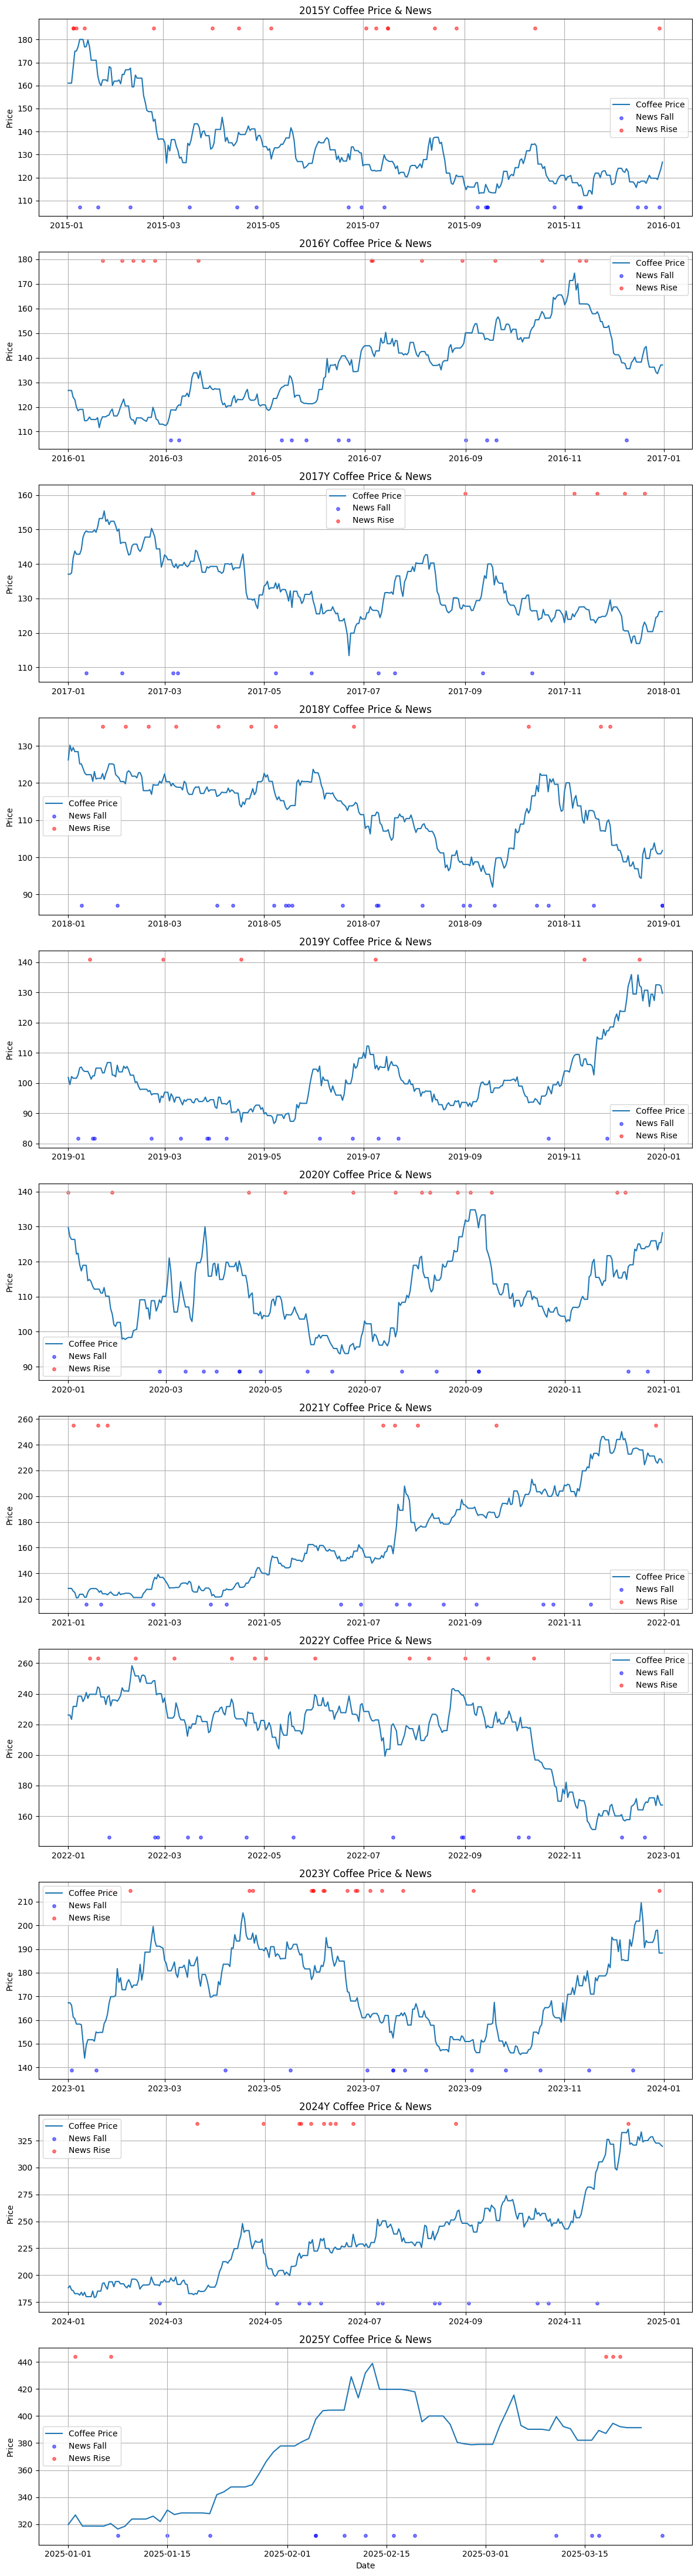

In [70]:
# 연도 리스트 추출
coffee_price_df['Date'] = pd.to_datetime(coffee_price_df['Date'])
news_df['date'] = pd.to_datetime(news_df['date'])

years = sorted(coffee_price_df['Date'].dt.year.unique())
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(12, 4 * n_years), sharex=False)

if n_years == 1:
    axes = [axes]  # 1년만 있을 때도 리스트로

for i, year in enumerate(years):
    ax = axes[i]
    # 해당 연도의 데이터 필터링
    coffee_year = coffee_price_df[coffee_price_df['Date'].dt.year == year]
    news_year = news_df[news_df['date'].dt.year == year]
    
    # 커피 가격 시계열
    ax.plot(coffee_year['Date'], coffee_year['Coffee_Price'], label='Coffee Price')
    
    y_min = coffee_year['Coffee_Price'].min()
    y_max = coffee_year['Coffee_Price'].max()
    
    # fall: 아래에 빨간 점
    news_fall = news_year[news_year['predicted_price_direction'] == 'fall']
    ax.scatter(news_fall['date'], [y_min - 5] * len(news_fall), color='blue', marker='o', alpha=0.5, label='News Fall', s=15)
    
    # rise: 위에 파란 점
    news_rise = news_year[news_year['predicted_price_direction'] == 'rise']
    ax.scatter(news_rise['date'], [y_max + 5] * len(news_rise), color='red', marker='o', alpha=0.5, label='News Rise', s=15)
    
    ax.set_title(f'{year}Y Coffee Price & News')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()